In [17]:
import numpy as np
import pandas as pd
import data_import
from policy_iter import PolicyIteration
from policy_iter_v2 import PolicyIterationV2
np.set_printoptions(linewidth=1000, edgeitems=300)
from matplotlib import pyplot as plt

In [2]:
pd_data: pd.DataFrame = data_import.read_files_to_pd_dataframe(
    [f"../outs/9_ball_grid_1_kg/ok_itr_{i}.xml.out" for i in range(500)]
    # [f"../outs/general/K4_with_middle.xml.out"]
)
pd_data.columns

Index(['index', 'N', 'Q', 'v0', 'Minv', 'M', 'ipopt_sol', 'policy_sol',
       'policy_converged', 'ipopt_converged', 'f_name', 'Q_size', 'Q_inv',
       'Q_inv_min_val', 'Q_inv_num_lt_0', 'Q_det', 'eigenvalues', 'cond_num',
       'cond_num_no_inf', 'Q_num_off_diag_entries', 'thetas', 'min_theta',
       'rank', 'nullity', 'ipopt_delta_KE', 'ipopt_policy', 'b'],
      dtype='object')

In [31]:
pis = []
pis2 = []
v1_diverges = []
v2_diverges = []
for i in range(len(pd_data)):
    pi = PolicyIteration(
        pd_data['Q'][i],
        pd_data['b'][i],
        # init_value=pd_data_tests_ipopt_start['ipopt_sol'][request.param],
        name=f"{i}"
    )
    pi.max_iter = 100
    if not pi.solve([]):
        v1_diverges.append(i)
    pis.append(pi)
    pi2 = PolicyIterationV2(
        pd_data['Q'][i],
        pd_data['b'][i],
        # init_value=pd_data_tests_ipopt_start['ipopt_sol'][request.param],
        name=f"{i}"
    )
    pi2.max_iter = 200
    pi2.solve(['diverge'])
    if not pi2.solve([]):
        v2_diverges.append(i)
    pis2.append(pi2)

23: DIVERGING CYCLE FROM 5 to 8 (length: 3)
51: DIVERGING CYCLE FROM 7 to 12 (length: 5)
104: DIVERGING CYCLE FROM 8 to 16 (length: 8)
109: DIVERGING CYCLE FROM 5 to 14 (length: 9)
136: DIVERGING CYCLE FROM 3 to 6 (length: 3)
144: DIVERGING CYCLE FROM 9 to 13 (length: 4)
151: DIVERGING CYCLE FROM 14 to 17 (length: 3)
178: DIVERGING CYCLE FROM 4 to 7 (length: 3)
179: DIVERGING CYCLE FROM 4 to 7 (length: 3)
188: DIVERGING CYCLE FROM 2 to 4 (length: 2)
219: DIVERGING CYCLE FROM 4 to 8 (length: 4)
229: DIVERGING CYCLE FROM 14 to 19 (length: 5)
254: DIVERGING CYCLE FROM 4 to 6 (length: 2)
255: DIVERGING CYCLE FROM 5 to 8 (length: 3)
296: DIVERGING CYCLE FROM 4 to 9 (length: 5)
316: DIVERGING CYCLE FROM 4 to 7 (length: 3)
319: DIVERGING CYCLE FROM 3 to 6 (length: 3)
339: DIVERGING CYCLE FROM 4 to 6 (length: 2)
340: DIVERGING CYCLE FROM 8 to 11 (length: 3)
354: DIVERGING CYCLE FROM 6 to 12 (length: 6)
374: DIVERGING CYCLE FROM 14 to 19 (length: 5)
433: DIVERGING CYCLE FROM 12 to 19 (length: 7

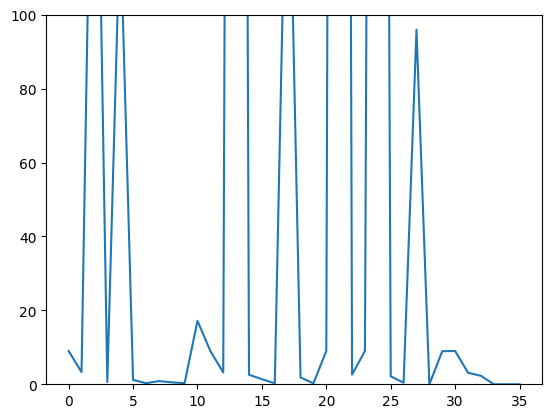

In [32]:
plt.ylim(0, 100)
plt.plot(pis2[340].intermediate_objective)

In [33]:
from scipy import stats


print(stats.describe([len(p.intermediate_values) for p in pis]))
print(stats.describe([len(p.intermediate_values) for p in pis2]))

print(v1_diverges)
print(v2_diverges)
for i in v1_diverges:
    print(f"for {i}, iters for v2 to converge:", len(pis2[i].intermediate_values))

DescribeResult(nobs=500, minmax=(2, 20), mean=5.344, variance=6.506677354709417, skewness=2.672886771891559, kurtosis=9.858360824429363)
DescribeResult(nobs=500, minmax=(3, 123), mean=8.414, variance=126.97254909819638, skewness=5.755742301148531, kurtosis=39.04543728478135)
[23, 51, 104, 109, 136, 144, 151, 178, 179, 188, 219, 229, 254, 255, 296, 316, 319, 339, 340, 354, 374, 433, 469, 480, 491, 496]
[]
for 23, iters for v2 to converge: 43
for 51, iters for v2 to converge: 67
for 104, iters for v2 to converge: 29
for 109, iters for v2 to converge: 60
for 136, iters for v2 to converge: 16
for 144, iters for v2 to converge: 46
for 151, iters for v2 to converge: 59
for 178, iters for v2 to converge: 38
for 179, iters for v2 to converge: 25
for 188, iters for v2 to converge: 20
for 219, iters for v2 to converge: 17
for 229, iters for v2 to converge: 73
for 254, iters for v2 to converge: 11
for 255, iters for v2 to converge: 17
for 296, iters for v2 to converge: 67
for 316, iters for v2 to

(array([ 79., 252., 110.,  34.,   4.,   7.,   5.,   3.,   3.,   3.]),
 array([ 2. ,  3.8,  5.6,  7.4,  9.2, 11. , 12.8, 14.6, 16.4, 18.2, 20. ]),
 <BarContainer object of 10 artists>)

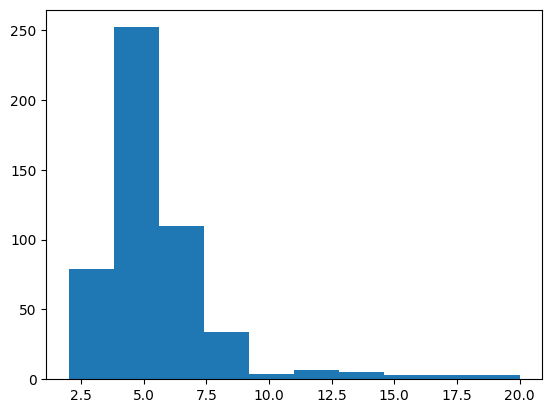

In [34]:
plt.hist([len(p.intermediate_values) for p in pis])

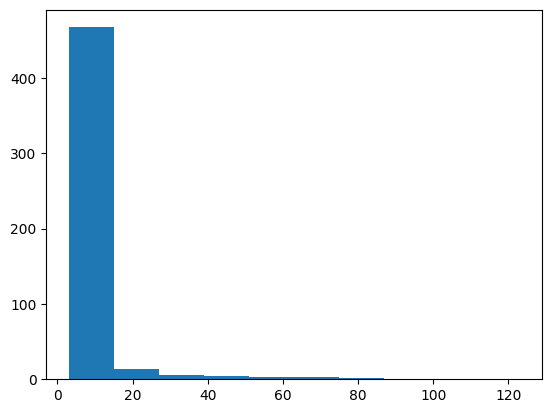

In [36]:
plt.hist([len(p.intermediate_values) for p in pis2])
# plt.yscale('log')
plt.show()

In [5]:
i = 188
for p in pis[i].intermediate_policies:
    print(p)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
[0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
[0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
[0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.]


In [6]:
def flatten_policy(p, size):
    flat_p = np.zeros(size)
    for x in p:
        flat_p[x] = 1
    return flat_p

def get_policy_submatrix(Q, p):
    policy_matrix = np.zeros(Q.shape)  # a matrix that will be used extract a sub-matrix of Q into A
    for i in range(len(p)):
        if p[i] == 1:
            policy_matrix[i,i] = 1
    I = np.eye(Q.shape[0])
    # get the submatrix of Q and store in A. A is the same size as Q, but has some rows/columns replaced by identity
    # depending on self.policy
    return policy_matrix @ Q @ policy_matrix + I - policy_matrix

ipopt_policy = flatten_policy(pd_data['ipopt_policy'][i], len(pd_data['b'][i]))
print(ipopt_policy)
print(pd_data['ipopt_sol'][i])

[0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1.]
[0.         0.44198209 0.36500452 0.7000963  0.         1.17686531 0.         0.09836756 0.54360569 0.         0.61146662 0.7982162  0.         0.70396187]


In [7]:
Q = pd_data['Q'][i]
b = pd_data['b'][i]
pi = pis[i]

for p in pi.intermediate_policies:
    print(min(np.linalg.svd(get_policy_submatrix(Q, p), compute_uv=False)))
    print(max(np.linalg.svd(get_policy_submatrix(Q, p), compute_uv=False)))
    print(np.linalg.matrix_rank(get_policy_submatrix(Q, p), tol=1e-10))

print(np.finfo(Q.dtype).eps)
print("ipopt soln")
print(min(np.linalg.svd(get_policy_submatrix(Q, ipopt_policy), compute_uv=False)))
print(np.linalg.matrix_rank(get_policy_submatrix(Q, ipopt_policy), tol=1e-10))

5.104937710973135e-13
4.45180975152684
13
2.8881757656529136e-05
4.285380282919935
14
0.15934705159180912
4.332678756894036
14
2.8881757656529136e-05
4.285380282919935
14
0.15934705159180912
4.332678756894036
14
2.220446049250313e-16
ipopt soln
0.5537476076367
14


In [8]:
pi = PolicyIteration(Q, b, initial_policy=ipopt_policy.copy())
pi.solve()
pi.intermediate_objective
pi.intermediate_values
pi.intermediate_policies

Iterator: CONVERGED IN 0 ITERATIONS


[array([0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.]),
 array([0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.])]